In [1]:
# imports
import basic
from torch import nn
from torch import optim
import torch

class NiN(basic.Net):
    def __init__(self):
        super(basic.Net).__init__()
        self.NiN()

    @staticmethod
    def nin_block(in_channels, out_channels, kernel_size, strides, padding):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(out_channels,out_channels,kernel_size=1),
            nn.ReLU()
        )
        
    def NiN(self):
        self.net = nn.Sequential(
            self.nin_block(1,96,kernel_size=11,strides=4,padding=0),
            nn.MaxPool2d(3,stride=2),
            self.nin_block(96,256,kernel_size=5,strides=1,padding=2),
            nn.MaxPool2d(3, stride=2),
            self.nin_block(256,384,kernel_size=3,strides=1,padding=1),
            nn.MaxPool2d(3,stride=2),
            nn.Dropout(0.5),
            self.nin_block(384,10,kernel_size=3,strides=1,padding=1),
            nn.AdaptiveAvgPool2d(1,1),
            nn.Flatten())

Files already downloaded and verified
Files already downloaded and verified
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
['bird', 'cat', 'bird', 'frog']


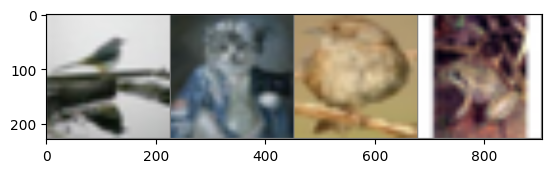

In [3]:
ROOT = "./data"
Model_PATH = "./model/NiN"
BatchSize = 128
optimizer = optim.SGD
criterion = nn.CrossEntropyLoss()

trains, tests, labels = basic.load_CIFAR10_datasets(BatchSize,224,ROOT)
print(labels)
basic.show_some_samples(trains,labels)